### problem 1

In [1]:
%reset -f
from functions import *
x1, x2, x3, x4, x5, x6 = sp.symbols('x1 x2 x3 x4 x5 x6')
DH = sp.Matrix([[x1, x2, -sp.Rational(3,4), 1],
                [x3,sp.Rational(1,4),x4,sp.sqrt(3)],
                [0,x5,x6,sp.Rational(1,3)],
                [0,0,0,1]])

DH_values = find_denevit_hartenberg_perameters_from_transformation(DH)
display(DH_values)

[{a: -2,
  alpha: 2*pi/3,
  d: 1/3,
  theta: -2*pi/3,
  x1: -1/2,
  x2: -sqrt(3)/4,
  x3: -sqrt(3)/2,
  x4: sqrt(3)/4,
  x5: sqrt(3)/2,
  x6: -1/2},
 {a: 2,
  alpha: -pi/3,
  d: 1/3,
  theta: pi/3,
  x1: 1/2,
  x2: -sqrt(3)/4,
  x3: sqrt(3)/2,
  x4: sqrt(3)/4,
  x5: -sqrt(3)/2,
  x6: 1/2}]

### Problem 2

In [2]:
%reset -f
from functions import *
R = sp.Matrix([[0,1,0],[0,0,1],[1,0,0]])
t = sp.symbols('t')
theta1 = sp.Function('theta1')(t)
theta2 = sp.Function('theta2')(t)
theta3 = sp.Function('theta3')(t)

rot_x = Rotation_matrix(theta1, 'x')[:3,:3]
rot_y = Rotation_matrix(theta2, 'y')[:3,:3]
rot_z = Rotation_matrix(theta3, 'z')[:3,:3]
Rot = rot_x*rot_y*rot_z
display(Rot)

R_02 = R*Rot
display(R_02)

skew = sp.simplify(R_02.diff(t)*R_02.inv())
omega = unskew_matrix(skew)
display(omega)



Matrix([
[                                               cos(theta2(t))*cos(theta3(t)),                                                -sin(theta3(t))*cos(theta2(t)),                 sin(theta2(t))],
[sin(theta1(t))*sin(theta2(t))*cos(theta3(t)) + sin(theta3(t))*cos(theta1(t)), -sin(theta1(t))*sin(theta2(t))*sin(theta3(t)) + cos(theta1(t))*cos(theta3(t)), -sin(theta1(t))*cos(theta2(t))],
[sin(theta1(t))*sin(theta3(t)) - sin(theta2(t))*cos(theta1(t))*cos(theta3(t)),  sin(theta1(t))*cos(theta3(t)) + sin(theta2(t))*sin(theta3(t))*cos(theta1(t)),  cos(theta1(t))*cos(theta2(t))]])

Matrix([
[sin(theta1(t))*sin(theta2(t))*cos(theta3(t)) + sin(theta3(t))*cos(theta1(t)), -sin(theta1(t))*sin(theta2(t))*sin(theta3(t)) + cos(theta1(t))*cos(theta3(t)), -sin(theta1(t))*cos(theta2(t))],
[sin(theta1(t))*sin(theta3(t)) - sin(theta2(t))*cos(theta1(t))*cos(theta3(t)),  sin(theta1(t))*cos(theta3(t)) + sin(theta2(t))*sin(theta3(t))*cos(theta1(t)),  cos(theta1(t))*cos(theta2(t))],
[                                               cos(theta2(t))*cos(theta3(t)),                                                -sin(theta3(t))*cos(theta2(t)),                 sin(theta2(t))]])

Matrix([
[-sin(theta1(t))*cos(theta2(t))*Derivative(theta3(t), t) + cos(theta1(t))*Derivative(theta2(t), t)],
[ sin(theta1(t))*Derivative(theta2(t), t) + cos(theta1(t))*cos(theta2(t))*Derivative(theta3(t), t)],
[                               sin(theta2(t))*Derivative(theta3(t), t) + Derivative(theta1(t), t)]])

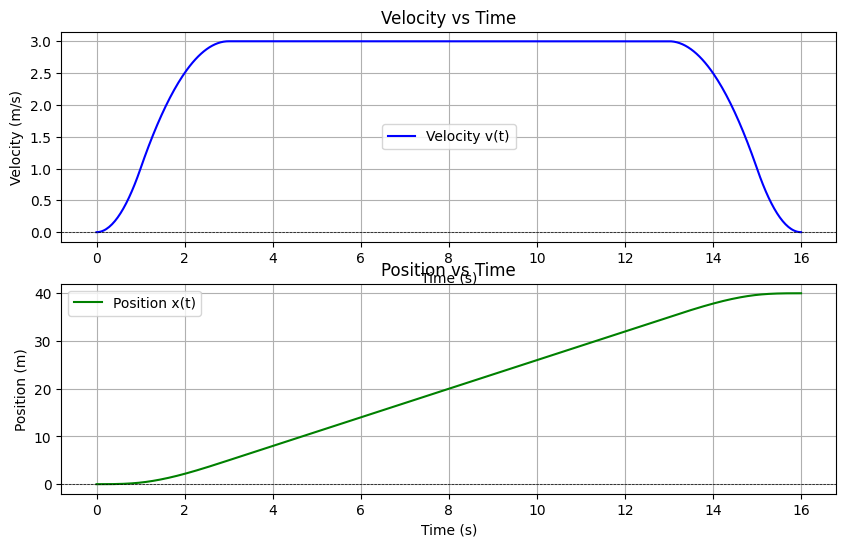

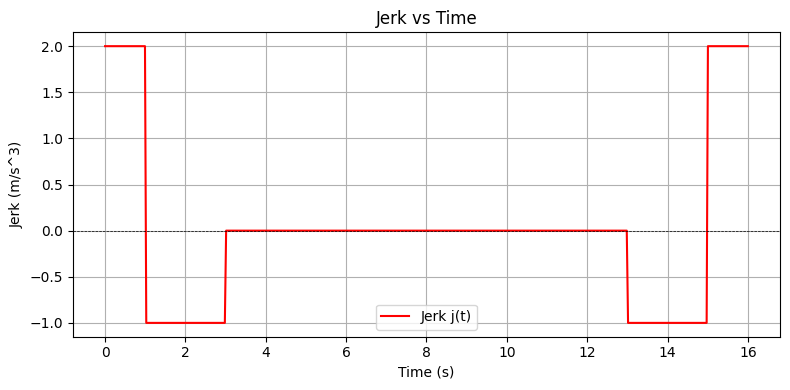

In [3]:
from sympy import symbols, Piecewise, Interval, integrate
import matplotlib.pyplot as plt
import numpy as np

# Define the variable and parameter
t = symbols('t', real=True)
T = symbols('T', real=True, positive=True)

# Define the piecewise function for acceleration
a_t = Piecewise(
    (2*t, Interval(0, 1, left_open=False, right_open=False).contains(t)),
    (3 - t, Interval(1, 3, left_open=False, right_open=False).contains(t)),
    (0, Interval(3, T, left_open=False, right_open=False).contains(t)),
    (T - t, Interval(T, T + 2, left_open=False, right_open=False).contains(t)),
    (2*t - 6 - 2*T, Interval(T + 2, T + 3, left_open=False, right_open=False).contains(t))
)

# Integrate acceleration to find velocity
v_t = integrate(a_t, t)

# Integrate velocity to find position
x_t = integrate(v_t, t)

jerk = a_t.diff(t)

# Define numerical values for T and the time range
T_value = 13  # Example value for T
time_range = np.linspace(0, T_value + 3, 500)

velocity = [float(v_t.subs({t: time, T: T_value})) for time in time_range]
position = [float(x_t.subs({t: time, T: T_value})) for time in time_range]
jerk = [float(jerk.subs({t: time, T: T_value})) for time in time_range]

# Plot the velocity and position
plt.figure(figsize=(10, 6))

# Velocity plot
plt.subplot(2, 1, 1)
plt.plot(time_range, velocity, label='Velocity v(t)', color='blue')
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()

# Position plot
plt.subplot(2, 1, 2)
plt.plot(time_range, position, label='Position x(t)', color='green')
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()

# Jerk plot
plt.figure(figsize=(8, 4))
plt.plot(time_range, jerk, label='Jerk j(t)', color='red')
plt.title('Jerk vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Jerk (m/s^3)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()



plt.tight_layout()
plt.show()


In [4]:
%reset -f
from functions import *

p0 = sp.Matrix([0.25,0.25, 0.1])
px = sp.Matrix([0.4526,0.3357,0.1])
py = sp.Matrix([0.0942,0.6184,0.1])


T = Transformation_matrix_from_3_points(p0,px,py)
display(T)

Point_b = sp.Matrix([0.1,0.1,0.1,1])

T_BC = sp.Matrix([[1,0,0,0.3],[0,-1,0,0.1],[0,0,-1,0.9],[0,0,0,1]])
p_c = T_BC.inv()*Point_b
display(p_c.evalf(4))

principal_point = sp.Matrix([320,240])
fx, fy = 500, 500

r = -fx*p_c[0]/p_c[2] + principal_point[0]
c = -fy*p_c[1]/p_c[2] + principal_point[1]

display(r.evalf(4))
display(c.evalf(4))

Matrix([
[ 0.921, -0.3896,   0, 0.25],
[0.3896,   0.921,   0, 0.25],
[     0,       0, 1.0,  0.1],
[     0,       0,   0,  1.0]])

Matrix([
[-0.2],
[   0],
[ 0.8],
[ 1.0]])

445.0

240.0

### problem 5

In [26]:
%reset -f
from functions import *

Vin, ia, thetam_dot, thetam_dot_dot, taum, taul, eta, X = sp.symbols('Vin ia thetadot_m thetaddot_m tau_m tau_l eta X')
theta_m, s, theta_m_star = sp.symbols('theta_m s theta_m_star')

Km = 0.7
Kb = 0.7
R = 100
Jm = 0.01
Dm = 0.003
eta = 1/50
ia = (Vin - Kb*thetam_dot)/R
taum = Km*ia
l2 = sp.Eq( Jm*thetam_dot_dot + Dm*thetam_dot , taum - eta*taul).subs({thetam_dot: theta_m*s, thetam_dot_dot: theta_m*s**2})
sol = sp.solve([l2], [theta_m])

Transfer = (sol[theta_m]/Vin*s).simplify()
without_dist = Transfer.subs({taul:0})
display(Normalize_fraction(without_dist,1000))

Kp = 1.2
etm = (theta_m_star - theta_m)

theta_m_sol  = sp.solve(Transfer.subs({Vin: Kp*etm}), theta_m)[0]
display(theta_m_sol)

input = theta_m_star
output = theta_m_sol
error = error = (input - output).subs({theta_m_star:1/s, taul:0})

Ess = sp.limit(error*s, s, 0)
print(f"Steady state error step 1, tau 0:")
display(Ess)


error = error = (input - output).subs({theta_m_star:1.5/s, taul:0.1/s})

Ess = sp.limit(error*s, s, 0)
print(f"Steady state error step 1.5, tau 0.1:")
display(Ess.evalf(4))


0.7/(1.0*s + 0.79)

-2.38095238095238*tau_l + theta_m_star

Steady state error step 1, tau 0:


0

Steady state error step 1.5, tau 0.1:


0.2381

In [6]:
%reset -f
from functions import *



s**2*LaplaceTransform(theta(t), t, s) + 2*s*LaplaceTransform(theta(t), t, s) - s*theta(0) + 2*LaplaceTransform(theta(t), t, s) - 2*theta(0) - Subs(Derivative(theta(t), t), t, 0)